<a href="https://colab.research.google.com/github/01DaisyLynn/Modeling/blob/main/MODELING_IP_Daisy_Lynn_5_2_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FIFA SCORES AND TEAMS**

## Defining the question

A) ***Data Analytic question***

To predict result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly

B) ***Metric of success***

Investigation gives the results of a game based on the team and the kind of match played

C) ***Context***

The men's FIFA World Ranking is a ranking system for men's national teams in association football. The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. 

D) ***Expremimental Design***



1.  Defining the Question 

2.  Reviewing dataset

3.  Data Cleaning

4.  Exploratory Analysis

5.  Multicollonearity

6.  Modelling

7.  Cross Validation

8.  Residual plots 







In [54]:
#Importing Pandas
import pandas as pd

#importing numpy
import numpy as np

#importing matplotlib
import matplotlib.pyplot as plt

#importing seaborn
import seaborn as sns

import datetime as dt

In [61]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

***results dataset***

In [30]:
#loading dataset
football = pd.read_csv('/content/results.csv')
football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
#getting the shape of our dataset
football.shape

#the dataset has 40839 rows and 9 columns

(40839, 9)

In [4]:
#checking if the data types 
football.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [5]:
#statistical description of our numerical variables
football.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [6]:
#Checking for duplicates
football.duplicated().any()

False

No presence of duplicated values in our dataset

In [7]:
#Checking for missing values
football.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

No presence of null/missing values in our dataset

***fifa ranking dataset***

In [33]:
#loading dataset
ranking = pd.read_csv('/content/fifa_ranking.csv')
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [34]:
#getting the shape of our dataset
ranking.shape

#the dataset has 57793 rows and 16 columns

(57793, 16)

In [35]:
#checking if the data types 
ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [36]:
#Checking for duplicated
ranking.duplicated().sum()

37

The're 37 duplicated rows

In [37]:
#dropping duplicates
ranking.drop_duplicates(keep='first', inplace = True)

In [38]:
# Checking whether the duplicates have been removed
ranking.duplicated().any()

False

In [39]:
#Checking for missing values
ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

There are no null/missing values

## Data cleaning

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


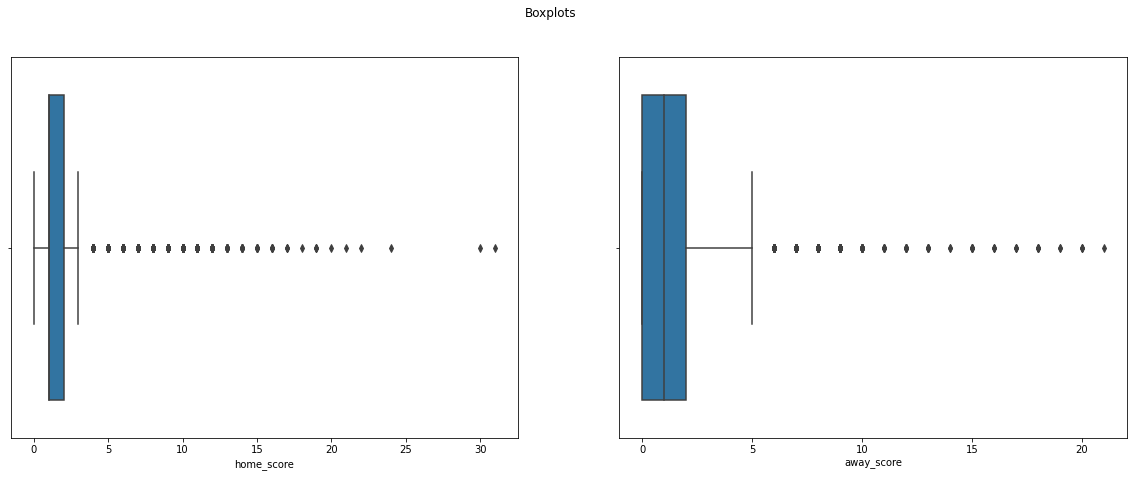

In [40]:
#checking for outliers
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(20,7))
fig.suptitle('Boxplots')
sns.boxplot(football['home_score'], ax=ax1)
sns.boxplot(football['away_score'], ax=ax2)
plt.show()

There is presence of outliers in our above numerical columns. The Outliers will not be dropped since there is a considerable amount of outliers which are still necessary for our prediction/analysis

In [110]:
#dropping columns
football.drop(['city','country','neutral'], axis = 1, inplace = True)
football

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,238,85,0,0,54
1,1873-03-08,85,233,4,2,54
2,1874-03-07,238,85,2,1,54
3,1875-03-06,85,233,2,2,54
4,1876-03-04,238,85,3,0,54
...,...,...,...,...,...,...
40834,2019-07-18,5,262,8,1,83
40835,2019-07-18,94,243,4,4,83
40836,2019-07-19,239,4,0,1,7
40837,2019-07-19,268,189,0,1,61


Columns were dropped since they're not neccessary to make the prediction of our analysis

## Exploratory Data Analysis

***Univariate Analysis***

In [41]:
#frequency table for tournament variable
football.tournament.value_counts()

Friendly                                16911
FIFA World Cup qualification             7100
UEFA Euro qualification                  2432
African Cup of Nations qualification     1616
FIFA World Cup                            900
                                        ...  
Dragon Cup                                  4
World Unity Cup                             4
Copa América qualification                  2
AFF Championship qualification              2
Atlantic Heritage Cup                       2
Name: tournament, Length: 109, dtype: int64

According to our frequency table most of the games played were friendly matches with 16911 records while the least were the Copa América qualification,AFF Championship qualification and Atlantic Heritage Cup with only 2

In [42]:
#frequency table for home_team variable
football.home_team.value_counts()

Brazil          563
Argentina       545
Mexico          510
Germany         501
England         489
               ... 
Sark              1
Crimea            1
Chameria          1
Saint Helena      1
Curacao           1
Name: home_team, Length: 309, dtype: int64

According to the above frequecy table the team that played most matches as the home team was Brazil

In [43]:
#frequency table for away_team variable
football.away_team.value_counts()

Uruguay               536
Sweden                527
England               505
Hungary               472
Paraguay              448
                     ... 
Andalusia               1
Corsica                 1
Barawa                  1
Parishes of Jersey      1
Central Spain           1
Name: away_team, Length: 306, dtype: int64

According to the above frequecy table the team that played most matches as the away team was Uruguay

In [44]:
# Finding the measures of central tendencies in the numerical columns

numerical_columns = 'home_score', 'away_score'

for column in numerical_columns:
  print('\n')
  print(column + ', Mean: '+ str(football[column].mean()))
  print(column + ', Mode: '+ str(football[column].mode()))
  print(column + ', Median: '+ str(football[column].median()))
  print(column + ', Standard deviation: '+ str(football[column].std()))
  print(column + ', Variance: '+ str(football[column].var()))
  print(column + ', Skewness: '+ str(football[column].skew()))
  print(column + ', Kurtosis: '+ str(football[column].kurt()))



home_score, Mean: 1.7457087587844953
home_score, Mode: 0    1
dtype: int64
home_score, Median: 1.0
home_score, Standard deviation: 1.74914491825338
home_score, Variance: 3.0595079450516236
home_score, Skewness: 2.2015038640372713
home_score, Kurtosis: 11.71410446777048


away_score, Mean: 1.188104507945836
away_score, Mode: 0    0
dtype: int64
away_score, Median: 1.0
away_score, Standard deviation: 1.4051198000976626
away_score, Variance: 1.974361652626495
away_score, Skewness: 2.59058860926579
away_score, Kurtosis: 15.757919940541624


Text(0.5, 1.0, 'Tournament Type')

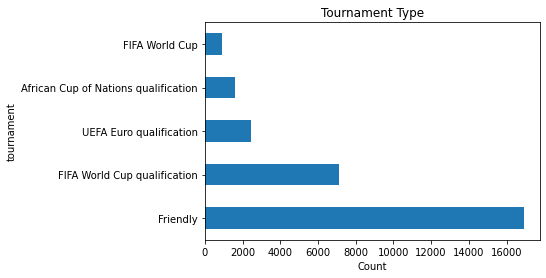

In [45]:
#Bargraph showcasing the highest type of tournament between matches
football['tournament'].value_counts().head().plot(kind= 'barh');

plt.xlabel("Count")
plt.ylabel("tournament")

# Giving a title to our Bar chart
plt.title("Tournament Type")

From the above graph we see that Friendly matches have the highest records

***Bivariate analysis***

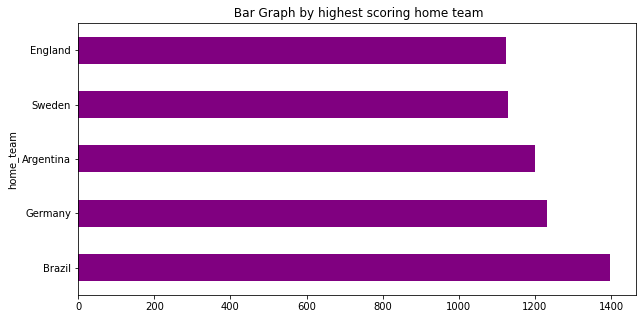

In [46]:
# plotting graph of the highest scoring home team
colors = ["purple"]
football_home=football[["home_team","home_score"]]
football_home1=football_home.groupby('home_team')['home_score'].sum().sort_values(ascending=False).head(5)


football_home1.plot(x='home_team', kind='barh',title=' Bar Graph by highest scoring home team', figsize=(10,5), color=colors);

According to the graph above Brazil was the highest scoring home team in all tournaments

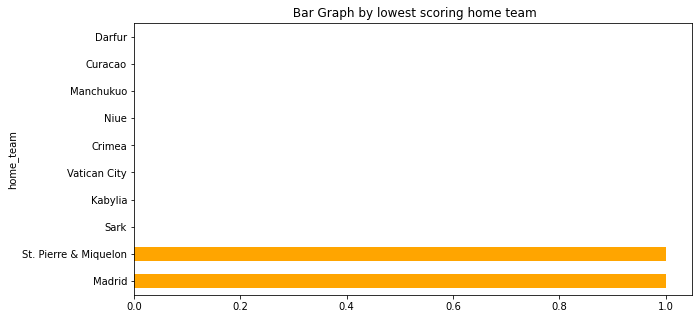

In [47]:
# plotting graph of the lowest scoring home team
colors = ["orange"]
football_home=football[["home_team","home_score"]]
football_home1=football_home.groupby('home_team')['home_score'].sum().sort_values(ascending=False).tail(10)


football_home1.plot(x='home_team', kind='barh',title=' Bar Graph by lowest scoring home team', figsize=(10,5), color=colors);

According to the graph above Kabylia,Niue,Manchukuo,Darfur,Curcao,Crimea,Vatican City,Sark have the lowest score as a home team with 0 score

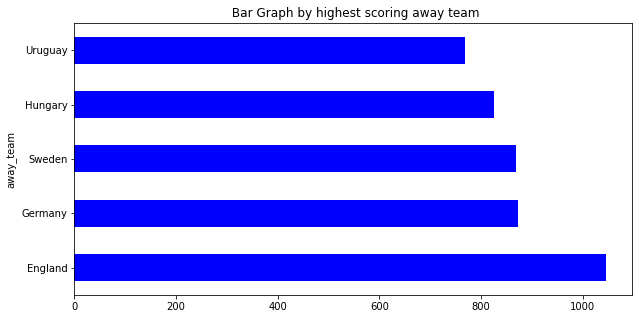

In [48]:
# plotting graph of the highest scoring away team
colors = ["blue"]
football_away=football[["away_team","away_score"]]
football_away1=football_away.groupby('away_team')['away_score'].sum().sort_values(ascending=False).head(5)


football_away1.plot(x='away_team', kind='barh',title=' Bar Graph by highest scoring away team', figsize=(10,5), color=colors);

According to the graph above England was the highest scoring away team in all tournaments

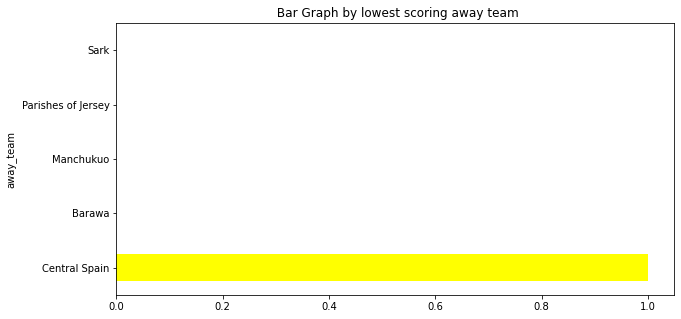

In [49]:
# plotting graph of the lowest scoring away team
colors = ["yellow"]
football_away=football[["away_team","away_score"]]
football_away1=football_away.groupby('away_team')['away_score'].sum().sort_values(ascending=False).tail(5)


football_away1.plot(x='away_team', kind='barh',title=' Bar Graph by lowest scoring away team', figsize=(10,5), color=colors);

According to the graph above Parishes of jersey,Sark,Barawa,Manchukuo have the lowest score as an away team with 0 score

In [111]:
#convert categorical data to numerical
from sklearn.preprocessing import LabelEncoder
en= LabelEncoder()

football['home_team'] = en.fit_transform(football['home_team'])
football['away_team'] = en.fit_transform(football['away_team'])
football['tournament'] = en.fit_transform(football['tournament'])
football.head(3)

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,238,85,0,0,54
1,1873-03-08,85,233,4,2,54
2,1874-03-07,238,85,2,1,54


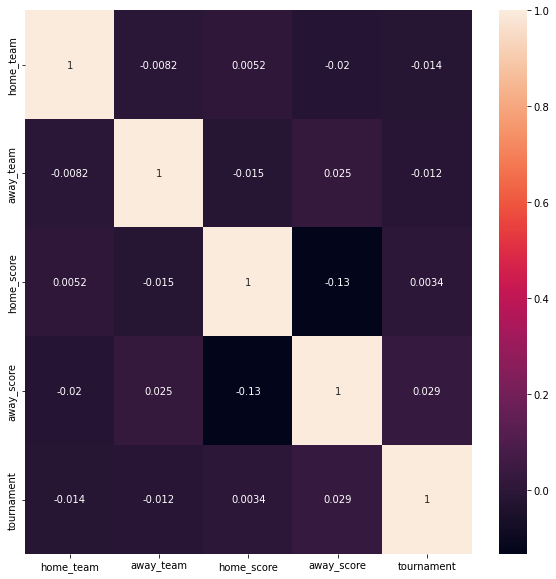

In [112]:
#correlation using a heatmap
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(football.corr(),annot=True)
plt.show()

The relationship between away_score and tournamentvariable which is 0.029 shows that it is a postive correlation ie if one increases the other also increases.

The relationship between home_team and tournament is -0.014 shows a negative correlation ie if one increases the other also decreases.

## Multicollonearity

In [113]:
correlations =football.corr()

correlations

,home_team,away_team,home_score,away_score,tournament
home_team,1.000000,-0.008210,0.005179,-0.019501,-0.013873
away_team,-0.008210,1.000000,-0.014927,0.024628,-0.011635
home_score,0.005179,-0.014927,1.000000,-0.133412,0.003414
away_score,-0.019501,0.024628,-0.133412,1.000000,0.029274
tournament,-0.013873,-0.011635,0.003414,0.029274,1.000000


A coefficient of 1 seems right since a variable is perfectly correlated to itself

In [114]:
#computing VIF score for each variable
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_team,away_team,home_score,away_score,tournament
home_team,1.000627,0.007875,-0.002632,0.018575,0.013439
away_team,0.007875,1.000958,0.011751,-0.023293,0.012397
home_score,-0.002632,0.011751,1.018322,0.135731,-0.007349
away_score,0.018575,-0.023293,0.135731,1.019932,-0.030334
tournament,0.013439,0.012397,-0.007349,-0.030334,1.001244


There's no need to drop any of the variables since their Variance Inflation Factor(VIF) isn't too high(almost or more than 5)

## Polynomial Regression

Predict how many goals the home team scores

In [115]:
#splitting dataset to the dependent(y) and independent variables(x)
X2=football[['home_team',"away_team","tournament"]].values
X2
y2=football[["home_score"]].values
y2

array([[0],
       [4],
       [2],
       ...,
       [0],
       [0],
       [1]])

In [116]:
# Split the dataset into train and test sets
X_train,X_test, Y_train,Y_test= train_test_split(X2,y2, test_size = 0.2, random_state=0)


# Standardising the X_train and the X_test to the same scale
#
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Fitting the polynomial features to the X_train and X_test
#
#poly_features = PolynomialFeatures(degree = 1)
#X_train = poly_features.fit_transform(X_train)
#X_test = poly_features.fit_transform(X_test)
print(len(X_train))
print(len(X_test))

32671
8168


our training set contains 32671 and our test set has 8168 records

In [117]:
# Fitting the polynomial features to the X_train and X_test
poly_features = PolynomialFeatures(degree = 3)
X_poly = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)
X_poly

array([[ 1.00000000e+00,  1.12832497e+00,  1.22916228e+00, ...,
         1.01214024e-01,  5.51637405e-03,  3.00653817e-04],
       [ 1.00000000e+00,  1.45065118e+00,  2.52819921e-01, ...,
         4.28198185e-03,  1.13463394e-03,  3.00653817e-04],
       [ 1.00000000e+00, -4.83306097e-01, -8.51376798e-01, ...,
         1.10862967e-01, -1.99162498e-02,  3.57790357e-03],
       ...,
       [ 1.00000000e+00, -2.53073088e-01,  6.59629238e-01, ...,
         2.91488909e-02,  2.96035899e-03,  3.00653817e-04],
       [ 1.00000000e+00,  1.56576768e+00, -1.30743150e-01, ...,
         2.61445256e-03, -3.05847333e-03,  3.57790357e-03],
       [ 1.00000000e+00, -2.64584738e-01,  1.35701664e+00, ...,
         2.81652248e-01,  3.17446780e-02,  3.57790357e-03]])

In [119]:
#linear model
LM=LinearRegression()
LM.fit(X_poly, Y_train)


LinearRegression()

In [120]:
# Making predictions

y_pred = LM.predict(X_test)
y_pred

array([[1.71894314],
       [1.8392566 ],
       [1.77343852],
       ...,
       [1.69650222],
       [1.71637308],
       [1.75685766]])

In [ ]:
# Measuing the accuracy of the model
from sklearn import metrics

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred))) 

Root Mean Squared Error: 1.7474987586697712


Our RMSE is 1.74 which is fairly okay. The lower the RMSE the better the accuracy

***residual plots***

In [121]:
#getting the mean of our residuals
residuals = np.subtract(y_pred, Y_test)
residuals.mean()

0.00039151067307016565

Our residuals are a mean of 0.00039

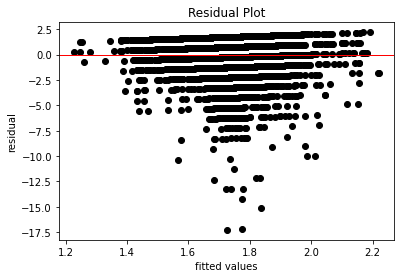

In [122]:

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

## Logistic regression

In [123]:
#setting conditons and variables to be used for prediction
conditions = [
    (football['home_score'] > football['away_score']),
    (football['home_score'] == football['away_score']),
    (football['home_score'] < football['away_score'])
]

# Values for each condition
values = ['W', 'D', 'L']

#new column where numpy will select values based on condition

football['status'] = np.select(conditions, values)

football

,date,home_team,away_team,home_score,away_score,tournament,status
0,1872-11-30,238,85,0,0,54,D
1,1873-03-08,85,233,4,2,54,W
2,1874-03-07,238,85,2,1,54,W
3,1875-03-06,85,233,2,2,54,D
4,1876-03-04,238,85,3,0,54,W
...,...,...,...,...,...,...,...
40834,2019-07-18,5,262,8,1,83,W
40835,2019-07-18,94,243,4,4,83,D
40836,2019-07-19,239,4,0,1,7,L
40837,2019-07-19,268,189,0,1,61,L


If the home team_score is greater than the away team_score that will be considered a win

If the home team_score is equal to the away team_score this is considered a draw

If the away team_score is greater than the home team_score that will be a considered a loss

In [125]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()

In [ ]:
#fitting our trains
logistic.fit(X_train, Y_train)

In [ ]:
#making prediction
y_pred=logistic.predict(X_test)
y_pred

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy is ', accuracy_score(Y_test, y_pred))

accuracy is  0.4824926542605289


Our prediction has an accuracy of 48% close to half % which is pretty good

In [ ]:
from sklearn.metrics import confusion_matrix

matrix= confusion_matrix(Y_test, y_pred)
matrix

array([[   0,    0, 1884],
       [   0,    0, 2343],
       [   0,    0, 3941]])

***Conclusion***

Our models have a pretty good accuracy for the prediction of our research